# Notebook te execute tests

In [1]:
%load_ext autoreload
%autoreload 2

# The import statements
from test_scripts import *
from experimentRunner import ExperimentRunner
from algorithms import *
from pathlib import Path
from metric_learn import NCA
from operator import itemgetter

def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

In [2]:
# The setup for the time management
import datetime
currentDate = datetime.date.today()
currentMonthName = currentDate.strftime("%B")
currentDay = currentDate.strftime("%d-%m")

from datetime import datetime

start_year = '2022/09/26'

# convert string to date object
d1 = datetime.strptime(start_year, "%Y/%m/%d")
d2 = datetime.strptime(str(currentDate), "%Y-%m-%d")

# difference between dates in timedelta
delta = d2 - d1
#print(f'Difference is {delta.days} days')

nbWeek = int(delta.days/7) + 1

import os
from pathlib import Path
path = Path('experimenten/' + currentMonthName + '/week' + str(nbWeek)).absolute()
CHECK_FOLDER = os.path.isdir(path)
if not CHECK_FOLDER:
    os.makedirs(path)
    print("created folder : ", path)

else:
    print(path, "folder already exists.")

e:\Projecten\Unif_proj\ThesisCode\Testing\experimenten\November\week6 folder already exists.


In [3]:
# Dictionary with all the algorithms, datasets and preprocessing 

datasets = dict()
path_data = Path('datasets/cobras-paper/').absolute()
dir_list = os.listdir(path_data)
for i in range(len(dir_list)):
    datasets[i + 1] = dir_list[i][:len(dir_list[i]) - 5]
print(datasets)

algos = {
    0: Cobras(),
    1: SemiSupervised(), # if None, use standard metric learner
    2: Supervised(),
    3: Preprocessed(),
    4: PortionPreprocessed()
}

ml_ss = {
    0: NCA(max_iter=100)
}

ml_semi = {
    0: NCA(max_iter=100)
}

{1: 'breast-cancer-wisconsin', 2: 'column_2C', 3: 'dermatology', 4: 'ecoli', 5: 'faces_expression_imagenet', 6: 'faces_eyes_imagenet', 7: 'faces_identity_imagenet', 8: 'faces_pose_imagenet', 9: 'glass', 10: 'hepatitis', 11: 'iris', 12: 'newsgroups_diff3', 13: 'newsgroups_sim3', 14: 'optdigits389_full', 15: 'parkinsons', 16: 'segmentation', 17: 'segmentation_training_only', 18: 'sonar', 19: 'spambase', 20: 'yeast'}


In [18]:
# Foldcreator

for key, value in datasets.items():
    k = ExperimentRunner("Fold creator " + value , path, currentDay)
    d = k.createFold(10, value)

## Effect of first training a metric on the trainingset or full set

Task exception was never retrieved
future: <Task finished name='Task-132' coro=<Client._gather.<locals>.wait() done, defined at c:\Users\maart\anaconda3\envs\metric\lib\site-packages\distributed\client.py:2002> exception=AllExit()>
Traceback (most recent call last):
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\distributed\client.py", line 2011, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-133' coro=<Client._gather.<locals>.wait() done, defined at c:\Users\maart\anaconda3\envs\metric\lib\site-packages\distributed\client.py:2002> exception=AllExit()>
Traceback (most recent call last):
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\distributed\client.py", line 2011, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-134' coro=<Client._gather.<locals>.wait() done, defined at c:\Users\maart\anaconda3\envs\me

Task was destroyed but it is pending!
task: <Task pending name='Task-1390965' coro=<RequestHandler._execute() running at c:\Users\maart\anaconda3\envs\metric\lib\site-packages\tornado\web.py:1704> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x0000020F0023A4F0>()]> cb=[_HandlerDelegate.execute.<locals>.<lambda>() at c:\Users\maart\anaconda3\envs\metric\lib\site-packages\tornado\web.py:2326]>


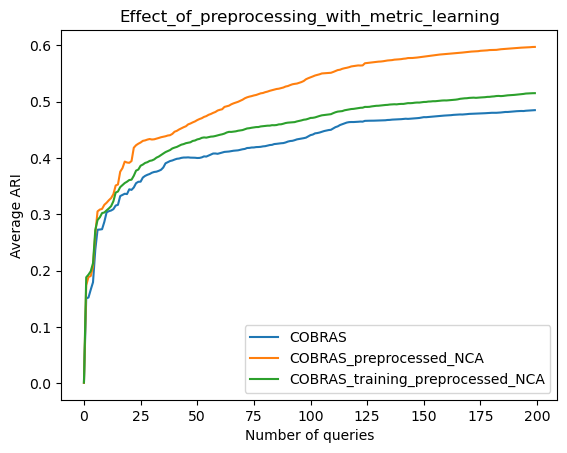

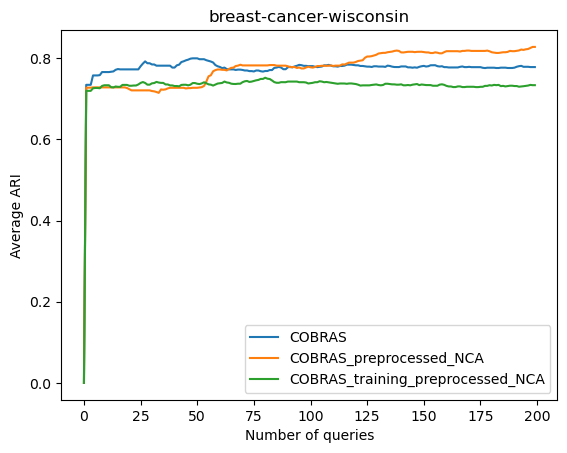

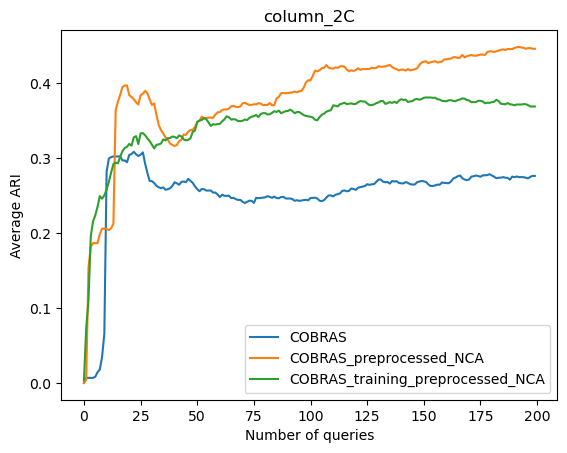

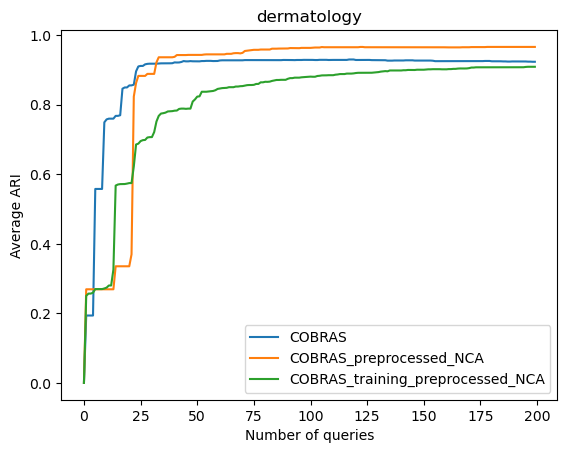

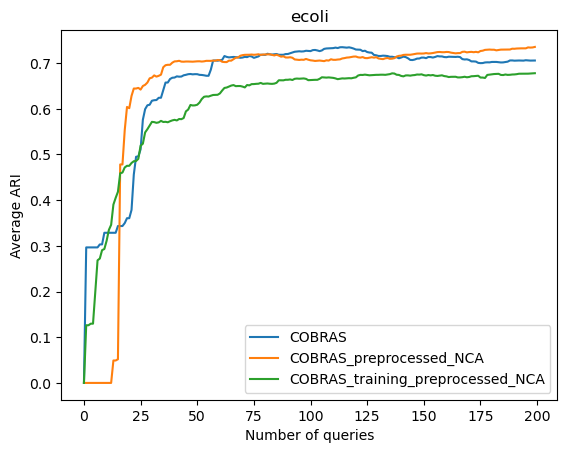

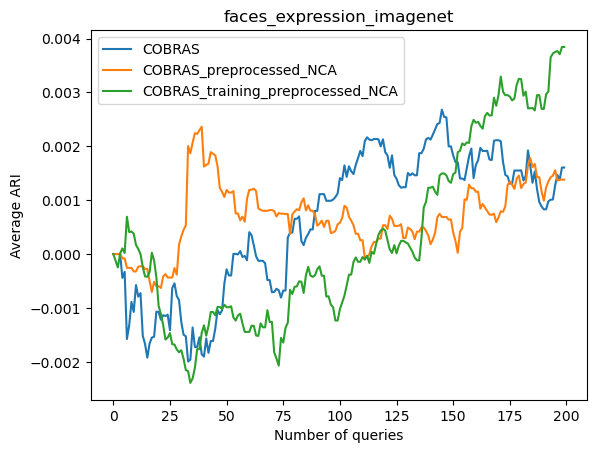

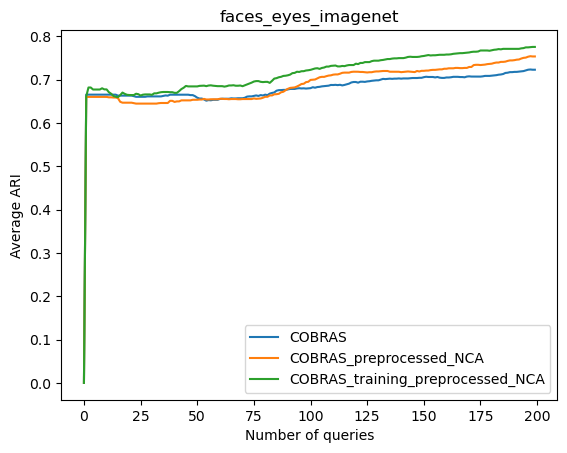

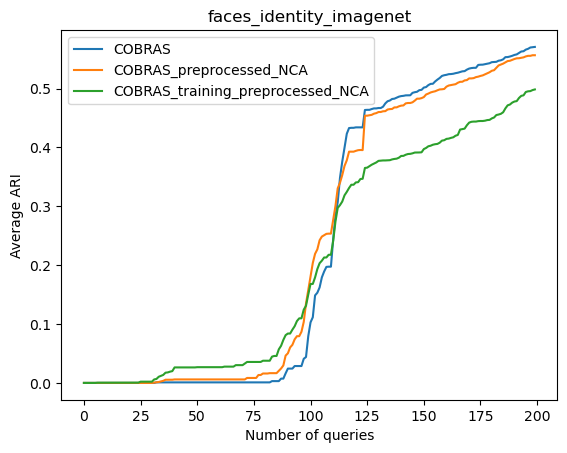

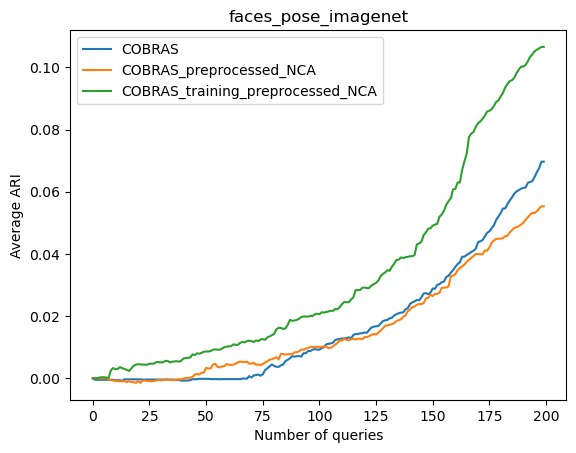

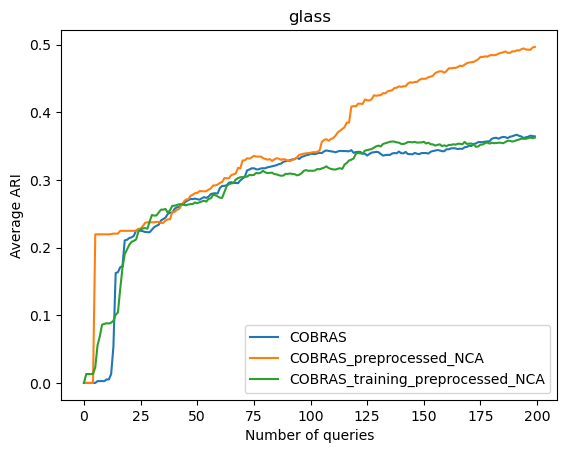

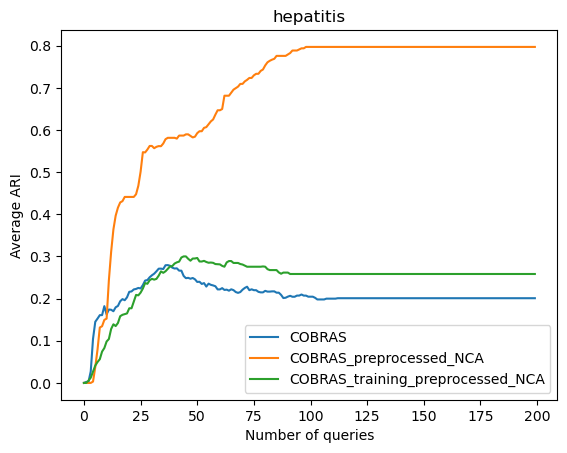

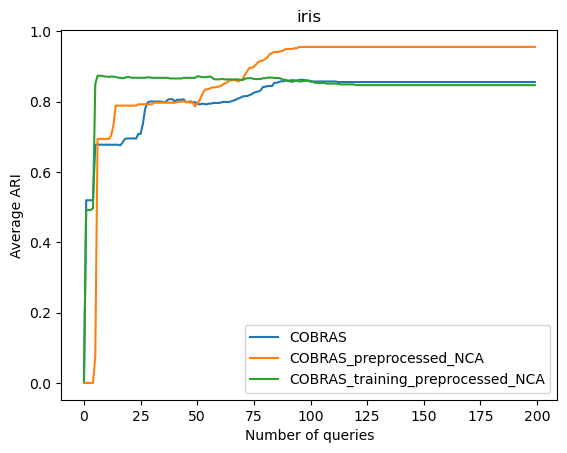

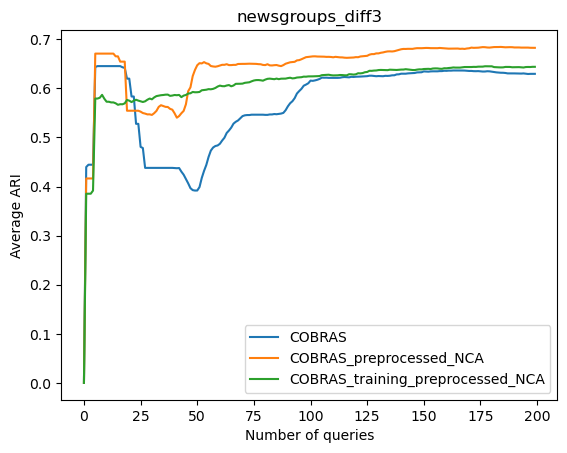

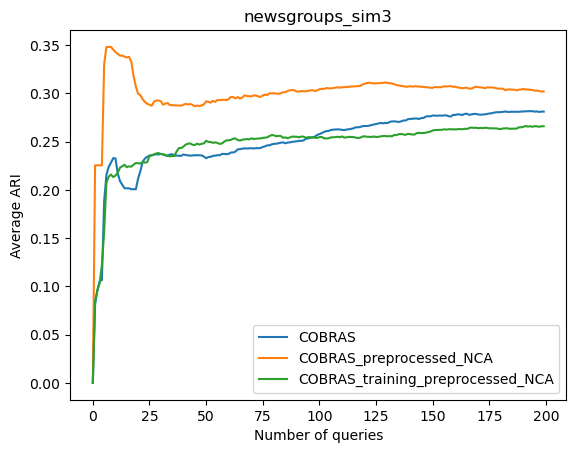

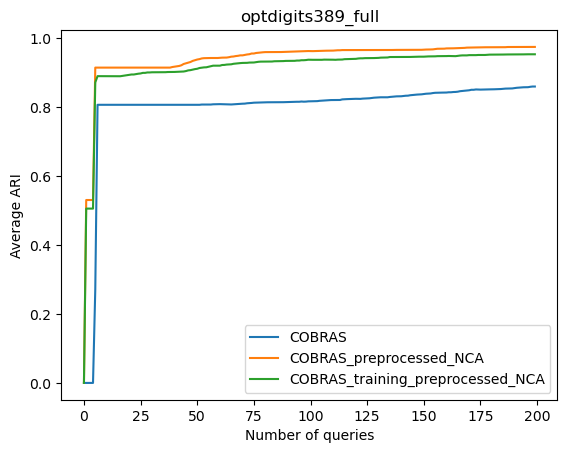

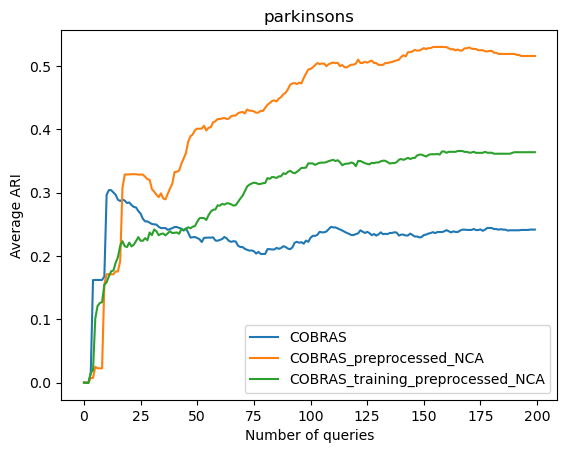

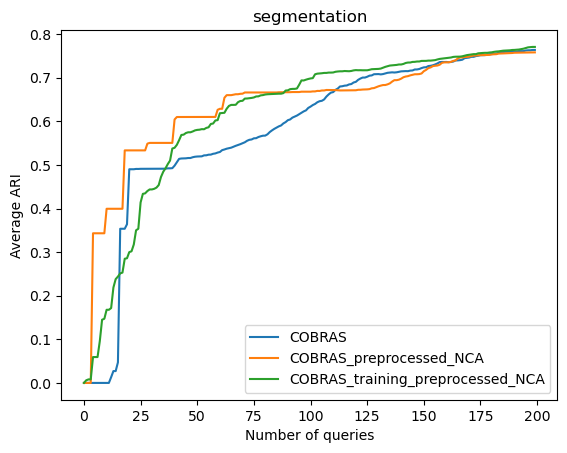

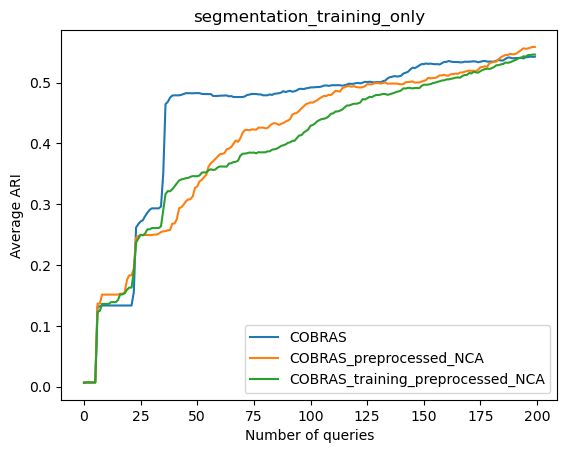

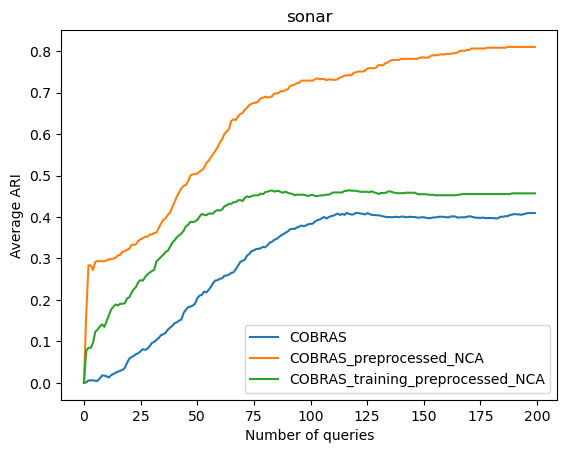

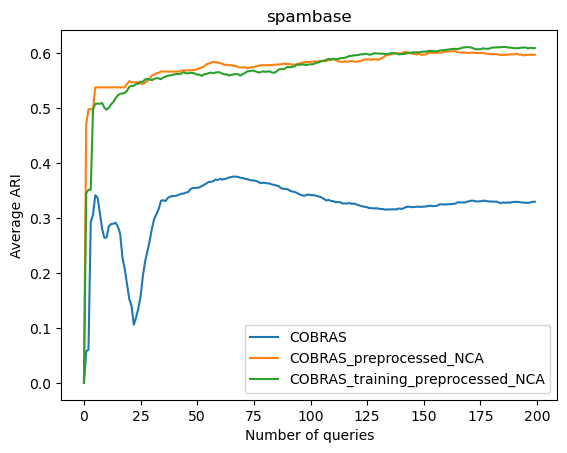

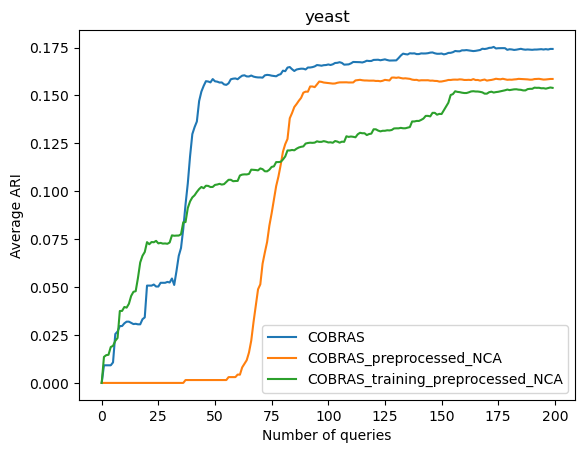

In [6]:
# %%capture
k = ExperimentRunner("Effect_of_preprocessing_with_metric_learning", path, currentDay, saveResults= True) # nog ARI berekenen
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo(list(itemgetter(0,3, 4)(algos)))
k.run(runsPQ= 10, maxQ=200, crossFold=1, save=True)
full = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=False)
seperate = k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False, seperate=True)
k.makeZip()

## Baseline

In [7]:
k = ExperimentRunner("Baseline", path, currentDay) # nog ARI berekenen
k.loadDataSets([]) # list(itemgetter(11, 10)(datasets)) to get specific datasets
k.addAlgo([Cobras(),BaselineSemiSupervised()])
k.run(runsPQ= 10, maxQ=200, crossFold=1, save=True)
k.makePlot(maxQ = 200, sortByAlgo=True, sortByDataset=False)

## Variance test

In [9]:
# variance test
k = ExperimentRunner("variance test", path, currentDay)
k.loadDataSets(["iris", "hepatitis"])
k.addAlgo([Cobras()])
k.run(runsPQ= 10, metricPreprocessing=False, maxQ=150)
k.run(runsPQ= 10, metricPreprocessing=True, maxQ=150)

k.makePlot()
